# Requests库介绍

Python进行网页爬取依赖的一个很重要的库——requests，下来先来一个小例子：

In [1]:
import requests

In [2]:
r = requests.get('https://www.baidu.com/')
r

<Response [200]>

200 表示连接成功，已得到爬取的内容，然后展示出来：

In [4]:
r.text[:1000]

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

text方法就得到了爬取网页的内容，其内容是网页的后台代码，一般在网页上右键查看源代码即可得到。

接下来是requests库的7个主要方法：

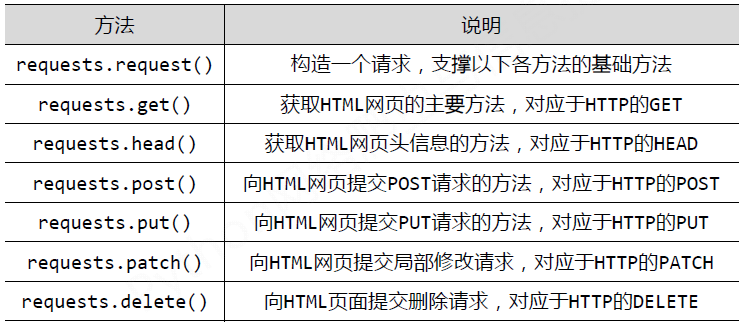

其中的post、put等方法均会对原网页产生影响，而且我们也没有权限这么做。最常用的还是get方法：

get方法得到的对象称为Response对象，即上文中的r。接下来学习Response对象的属性：

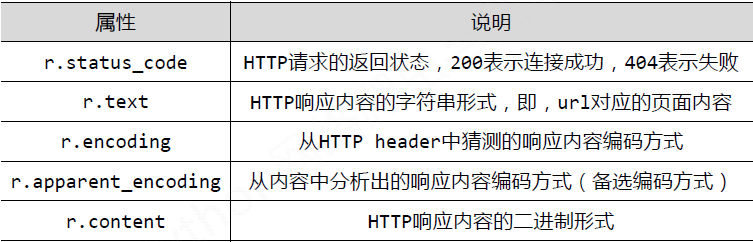

以爬取百度首页为例，展示以上属性的应用：

In [14]:
r = requests.get('https://www.baidu.com/')
r.status_code

200

状态码200，表示HTTP请求成功。

In [15]:
r.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

可以看到，返回的内容里没有中文，怀疑编码有问题，继续往下看。

In [7]:
r.encoding

'ISO-8859-1'

从HTTP header中猜测的编码方式为'ISO-8859-1'，此种编码形式无法识别中文。

In [10]:
r.apparent_encoding

'utf-8'

从内容分析的相应内容得到的编码方式为'utf-8'，此种编码可识别中文。

In [11]:
r.encoding = 'utf-8'

另得到的response的编码方式为'utf-8'，然后再次查看内容：

In [12]:
r.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class="bg s

可以看到，内容里有中文了。

**理解r.encoding和r.apparent_encoding：**

r.encoding： 如果header中不存在charset，则认为编码为IOS-8859-1,r.text根据r.encoding显示网页内容。

r.apparent_encoding： 根据网页内容分析出的编码方式，可以看作是r.encoding的备选。

# 爬取网页的通用代码

In [17]:
import requests

def getHTMLText(url):
    try:
        r = requests.get(url, timeout=30)
        r.raise_for_status() #如果状态不是200，引发HTTPError异常
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "产生异常"
if __name__ == "__main__":
    url = "http://www.baidu.com/"
    print(getHTMLText(url))

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input type=submit id=su val

# 网络爬虫盗亦有道

一般个人使用的爬虫规模小，数据量小，爬取速度不敏感，使用的只要是requests库。中等规模及大规模的而搜索引擎需要用到scrapy乃至于专门定制。

爬虫牵扯到一定的隐私，于是制定了Robots协议用以告知哪些页面可以爬取，其形式是在网站根目录下的robots.txt文件中。

# 实战入门

## 亚马逊商品页面爬取

In [25]:
import requests
r = requests.get('https://www.amazon.cn/ref=nav_logo')
r.status_code

200

常规的爬取已经会了，这里本来想找个无法直接得到response的网站，一时半会儿没找到。假装其无法得到200返回状态，得到的是503，让我们来看下其原因可能是什么：

In [20]:
r.request.headers #查看提交给网站的headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

python很直接，用户一栏就写着'python-requests/2.18.4'，我们此处需要做一下伪装：

In [27]:
headers = {'User-Agent':'Mozilla/5.0'} #用火狐浏览器伪装
url = 'https://www.amazon.cn/ref=nav_logo'
r = requests.get(url,headers=headers)
r.text[:1000]

'\n\n  \n  \n\n\n\n\n\n\n\n\n      \n  <!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">\n  <head>\n<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>\n<script type="text/javascript">\n\nvar ue_hob=+new Date();\nvar ue_id=\'WWDZSTRJP87YJT41SDCJ\',\nue_csm = window,\nue_err_chan = \'jserr-rw\',\nue = {};\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){if(1==window.ueinit)try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\nue.stub(ue,"log");ue.stub(ue,"onunload");ue.stub(ue,"onflush");\n\n(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!=

知识点已学到，就是用headers = {'User-Agent':'Mozilla/5.0'}等代替python自己。其他的可以套用通用框架。

## 搜索引擎关键词提交接口

In [28]:
#百度搜索
import requests
kv = {'wd':'Python'}
r = requests.get('http://www.baidu.com/s',params=kv)
r.request.url

'http://www.baidu.com/s?wd=Python'

In [32]:
r.text[:1000]

'<!DOCTYPE html>\n<!--STATUS OK-->\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<html>\n\t<head>\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\n\t\t<meta content="always" name="referrer">\n        <meta name="theme-color" content="#2932e1">\n        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">\n        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />\n\t\t\n\t\t\n<title>Python_百度搜索</title>\n\n\t\t\n\n\t\t\n<style data-for="result" type="text/css" id="css_newi_

In [33]:
#360搜索
import requests
kv = {'q':'Python'}
r = requests.get('http://www.so.com/s',params=kv)
r.request.url

'https://www.so.com/s?q=Python'

In [34]:
r.text[:1000]

'<!DOCTYPE html>\n<!--[if lt IE 7 ]><html class="ie6"><![endif]-->\n<!--[if IE 7 ]><html class="ie7"><![endif]-->\n<!--[if IE 8 ]><html class="ie8"><![endif]-->\n<!--[if IE 9 ]><html class="ie9"><![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--><html><!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta content="always" name="referrer">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<title>Python_360搜索</title>\n<link rel="dns-prefetch" href="//p.ssl.qhimg.com"><link rel="dns-prefetch" href="//s.ssl.qhimg.com"><link rel="dns-prefetch" href="//s.ssl.qhres.com">\n<link rel="shortcut icon" href="https://s.ssl.qhres.com/static/52166db8c450f68d.ico" type="image/x-icon">\n<link rel="search" type="application/opensearchdescription+xml" href="https://www.so.com/soopensearch.xml" title="360搜索">\n<style type="text/css">body{background:#fff;color:#333;min-width:1000px;position:relative}body,th,td{font-family:arial}html,body,ul,ol,li,dl,dd,h1,h2,h3,h4,h5,h6,pre,form,input,button,texta

## 网络图片的爬取

In [39]:
import requests
path = 'E://abc.jpg'
url = 'http://img1.gamebox.duowan.com/images/upload/2014/04/30/17/68805a03-1005-4759-b4d0-0c226c030bc5.jpg'
r = requests.get(url)
r.status_code

200

In [40]:
with open(path,'wb') as f:   #照片保存要以二进制b
    f.write(r.content)   #注意不是r.text了

以上代码测试成功，下面给出全部代码：

In [41]:
import requests
import os  #提供操作文件和目录以及处理路径的方法

url = 'http://img1.gamebox.duowan.com/images/upload/2014/04/30/17/68805a03-1005-4759-b4d0-0c226c030bc5.jpg'
root = 'D://Pic//'
path = root + url.split('/')[-1] #得到文件名
try:
    if not os.path.exists(root): 
        os.mkdir(root)    #如果目录不存在，就创建目录
    if not os.path.exists(path):  
        r = requests.get(url)   #如果文件不存在，就爬取
        with open(path, 'wb') as f:
            f.write(r.content)
            f.close()
            print('文件保存成功')
    else:
        print('文件已存在')
except:
    print('爬取失败')

文件保存成功


**小结**

以上所学仅仅到网页的整体爬取，那么如果从所获取的网页内容中得到自己想要的信息，从而整理成数据进而分析呢？

接下来学习Beautiful Soup库，用以提取网页中自己想要的内容。

# Beautiful Soup库介绍

以一个demo来学习：

In [2]:
import requests
r = requests.get('https://python123.io/ws/demo.html')
r.text

'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [3]:
demo = r.text

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(demo,'html.parser')  #bs4的HTML解析器
print(soup.prettify()) 

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


.prettify()方法可以让显示更加友好。为HTML文本<>及其内容增加'\n'

.prettify()也可用于标签：

In [29]:
print(soup.a.prettify())

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
 Basic Python
</a>



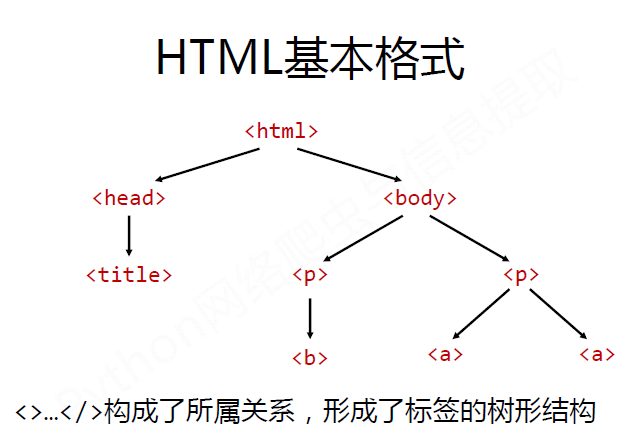

BeautifulSoup解析的网页结构如上图，是HTML格式。**bs4将任何HTML输入都变成'utf-8'编码，python 3.x解析无障碍。**

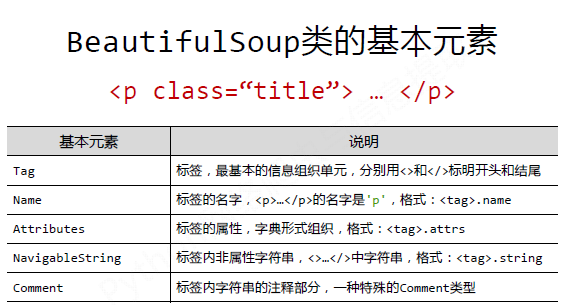

以demo为例：

## Tag 标签

In [7]:
soup.title

<title>This is a python demo page</title>

In [13]:
tag = soup.a #获取第一个<a /a> tag
tag

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>

需要注意的是，tag里的name---'a',属性---'class'、'href'等之间是空格，而不是逗号。

## Tag的name

In [10]:
soup.a.name

'a'

In [11]:
soup.a.parent.name

'p'

In [12]:
soup.a.parent.parent.name

'body'

## Tag的attrs(属性)

In [14]:
tag.attrs

{'class': ['py1'],
 'href': 'http://www.icourse163.org/course/BIT-268001',
 'id': 'link1'}

tag的属性为字典格式，可以按键取值

In [15]:
tag.attrs['class']

['py1']

In [16]:
tag.attrs['href']

'http://www.icourse163.org/course/BIT-268001'

In [17]:
type(tag.attrs)

dict

In [18]:
type(tag)

bs4.element.Tag

## Tag的NavigableString

In [20]:
soup.a.string

'Basic Python'

In [21]:
soup.p

<p class="title"><b>The demo python introduces several python courses.</b></p>

In [22]:
soup.p.string

'The demo python introduces several python courses.'

In [23]:
type(soup.p.string)

bs4.element.NavigableString

## Tag的Comment

标签内字符串的注释部分,是一种特殊的类型

In [26]:
newsoup = BeautifulSoup('<b><!--This is a comm\
ent--></b>','html.parser')

In [27]:
newsoup.b.string

'This is a comment'

In [28]:
type(newsoup.b.string)

bs4.element.Comment

# 基于bs4的查找方法

bs4的**find_all**方法

find_all (name,attrs,recursive,string,**kwargs)

name：对标签名称检索

In [36]:
soup.find_all('a')

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

In [31]:
soup.find_all(['a','b'])

[<b>The demo python introduces several python courses.</b>,
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

attrs：对标签的属性值检索

In [38]:
soup.find_all('p','course') #查找名字为'p'，属性为'course'的tag

[<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>]

也可以直接只检索属性值：

In [39]:
soup.find_all(id='link1')

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]

查找得到的是整个标签内容

# 正则表达式--re库介绍

在查找某个特定的字符串时，可以把整个字符串进行查找。如果字符串很长，有没有一种通用的字符代表方式？引入正则表达式。

正则表达式是一种用来匹配字符串的强有力的武器，它的设计思想是用一种描述性的语言来给字符串定义一个规则。

整体匹配：

In [43]:
import re
soup.find_all(id=re.compile('link1'))

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]

正则表达式匹配：

In [46]:
soup.find_all(id=re.compile('l\w{3}\d'))

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

'l\w{3}\d'可以匹配link1和link2，拆分思想是l后面跟3个字母再跟一个数字。

详细内容见另一篇正则表达式re的详细文档，[正则表达式---re库.ipynb]http://localhost:8888/notebooks/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0/python%E7%A7%91%E5%AD%A6%E8%AE%A1%E7%AE%97%E5%BA%93%E5%AD%A6%E4%B9%A0/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F---re%E5%BA%93.ipynb

# 实战深入

## 中国大学排名定向爬虫

# pyspider学习